In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
np.random.seed(44)

## Define a Fitness Function

In [2]:
rhc_run_stats = pd.read_pickle("./pickles/knapsack_rhc_run_stats.pkl")
rhc_run_curves = pd.read_pickle("./pickles/knapsack_rhc_run_curves.pkl")
sa_run_stats = pd.read_pickle("./pickles/knapsack_sa_run_stats.pkl")
sa_run_curves = pd.read_pickle("./pickles/knapsack_sa_run_curves.pkl")
ga_run_stats = pd.read_pickle("./pickles/knapsack_ga_run_stats.pkl")
ga_run_curves = pd.read_pickle("./pickles/knapsack_ga_run_curves.pkl")
mmc_run_stats = pd.read_pickle("./pickles/knapsack_mmc_run_stats.pkl")
mmc_run_curves = pd.read_pickle("./pickles/knapsack_mmc_run_curves.pkl")

In [2]:
knapsack_len=200
# weights between 10 to 40
knapsack_weights=np.random.uniform(10,40,knapsack_len)
# values between 20 to 30
knapsack_values=np.random.uniform(20,30,knapsack_len)
max_weight_pct = 0.5
problem = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

## Define an Optimization Problem Object
We use the fitness function as input into the optimization problem

__TSPOpt() descrive TSP optimization__

### Random Hill Climb

In [3]:
%%time
# DiscreteOpt() takes integers in range 0 to max_val-1

runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])
rhc_run_stats, rhc_run_curves = runner_return.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[100], max_iters:[10000], current_restart:[0]
runner_name:[rhc], experiment_name:[first_try], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2527.8401]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

restarts:[100], max_iters:[10000], current_restart:[0]
runner_name:[rhc], experiment_name:[first_try], attempt:[101], iteration:[106], done:[True], time:[0.01], fitness:[2585.7434]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

restarts:[100], max_iters:[10000], current_restart:[1]
runner_name:[rhc], experiment_name:[first_try], attempt:[0], iteration:[0], done:[False], time:[0.01], fitne

In [3]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

20.0

Text(0, 0.5, 'Value')

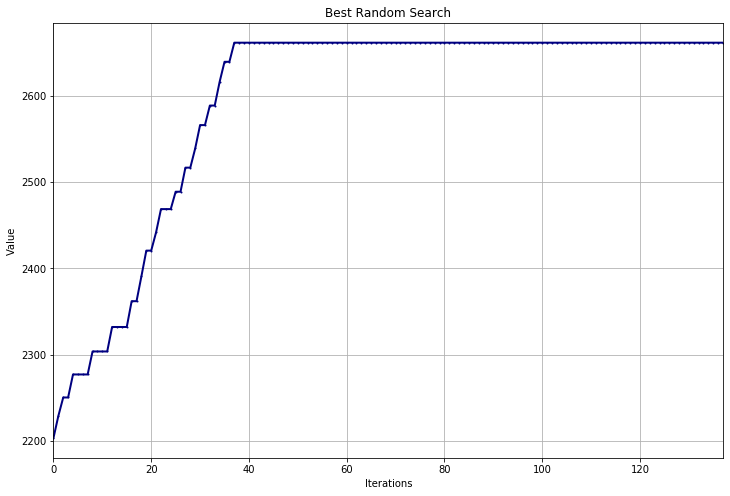

In [4]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [5]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

1573.6822015634418 2661.6814381022496
7.189299423989723


## Simulated Annealing

In [5]:
%%time
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=44, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2527.8401]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[101], iteration:[114], done:[True], time:[0.01], fitness:[2605.8326]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[0], iteration:[0], done:[Fal

In [11]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

2619.988053055133 2735.2772508948856
0.07322492894470795


In [12]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

ExpDecay(init_temp=50, exp_const=0.005, min_temp=0.001)

Text(0, 0.5, 'Value')

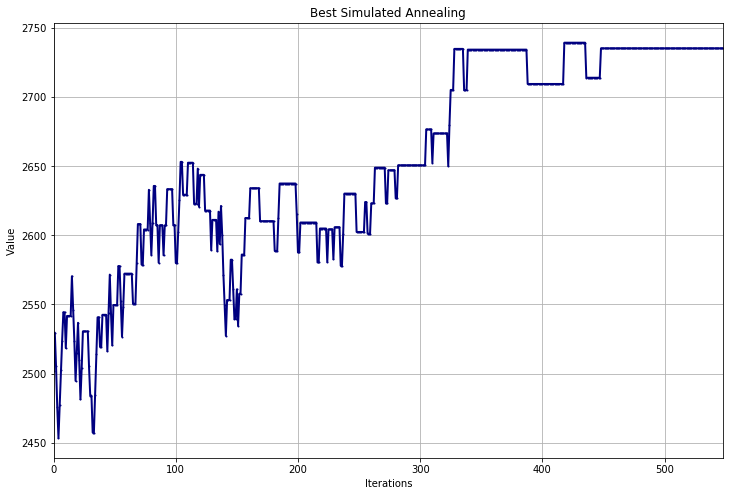

In [13]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

## Genetic Alg

In [3]:
%%time
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[500, 1000],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[2527.8401]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

pop_size:[500], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[101], iteration:[260], done:[True], time:[43.75], fitness:[3248.2910]
	[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0// 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1// 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.25], max_iters:[100000]
runner_nam

In [4]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
3256.2188331451816 3254.8975312326183 74.21409049099991
Mutation Rate
0.10    3252.254927
0.25    3256.218833
0.50    3256.218833
Name: Fitness, dtype: float64
Population Size
500     3253.576229
1000    3256.218833
Name: Fitness, dtype: float64
Population Size
500     50.846998
1000    97.581183
Name: Time, dtype: float64


## MIMIC

In [5]:
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name="MMC_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[500,1000],
                          keep_percent_list=[0.1, 0.25, 0.5],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[2527.8401]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[101], iteration:[117], done:[True], time:[122.97], fitness:[3180.1850]
	[0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.// 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.// 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[Tru

In [6]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
3251.75342273807 3224.5972343456765 202.96786778516739
Keep Percent
0.10    3212.805241
0.25    3232.000295
0.50    3228.986167
Name: Fitness, dtype: float64
Population Size
500     3204.339830
1000    3244.854638
Name: Fitness, dtype: float64
Population Size
500     138.366355
1000    267.569381
Name: Time, dtype: float64


In [16]:
rhc_run_stats.to_pickle("./knapsack_rhc_run_stats.pkl")
rhc_run_curves.to_pickle("./knapsack_rhc_run_curves.pkl")
sa_run_stats.to_pickle("./knapsack_sa_run_stats.pkl")
sa_run_curves.to_pickle("./knapsack_sa_run_curves.pkl")
ga_run_stats.to_pickle("./knapsack_ga_run_stats.pkl")
ga_run_curves.to_pickle("./knapsack_ga_run_curves.pkl")
mmc_run_stats.to_pickle("./knapsack_mmc_run_stats.pkl")
mmc_run_curves.to_pickle("./knapsack_mmc_run_curves.pkl")
